In [376]:
import pandas as pd
hn19 = pd.read_sas('./HN19_ALL.sas7bdat', format='sas7bdat')
hn20 = pd.read_sas('./HN20_ALL.sas7bdat', format='sas7bdat')
hn21 = pd.read_sas('./HN21_ALL.sas7bdat', format='sas7bdat')


In [377]:
print(len(hn19.columns.tolist()))
print(len(hn20.columns.tolist()))
print(len(hn21.columns.tolist()))

896
843
840


In [378]:
ob = ['BO1', 'BO1_1', 'BO1_2', 'BO1_3', 'BO2_1'] # 공통 
obc = ['BO3_01', 'BO3_01', 'BO3_02', 'BO3_03', 'BO3_14', 'BO3_05', 'BO3_04', 'BO3_12', 'BO3_07',
                          'BO3_09', 'BO3_10', 'BO3_11'] # 2019년도만 
he_obe = ['HE_obe']

'''
【정의】
(비임신자 중)
 저체중: 체질량지수가 18.5kg/m2 미만인 사람
 정상: 체질량지수가 18.5kg/m2 이상, 23kg/m2 미만인 사람
 비만전단계: 체질량지수가 23kg/m2 이상, 25kg/m2 미만인 사람
 ④1단계비만: 체질량지수가 25kg/m2 이상, 30kg/m2 미만인 사람
 ⑤2단계비만: 체질량지수가 30kg/m2 이상, 35kg/m2 미만인 사람
 ⑥3단계비만: 체질량지수가 35kg/m2 이상인 사람
'''
#          집락      층화       가중치 
default = ['psu', 'kstrata', 'wt_itvex', 'sex', 'age'] 

mental_depress= ['BP_PHQ_1', 'BP_PHQ_2', 'BP_PHQ_3', 'BP_PHQ_4', 'BP_PHQ_5', 'BP_PHQ_6', 'BP_PHQ_7',
         'BP_PHQ_8', 'BP_PHQ_9', 'mh_PHQ_S'] # 2020년도만 
mental_anxiety= ['BP_GAD_1', 'BP_GAD_2', 'BP_GAD_3', 'BP_GAD_4', 'BP_GAD_5', 'BP_GAD_6', 'BP_GAD_7',
          'mh_GAD_S'] # 2021년만도만 해당 
mental_stress=['BP1', 'BP5', 'BP6_10', 'BP6_2', 'BP6_31', 'BP7', 'mh_stress'] # 공통 

sleep_time = ['BP16_1', 'BP16_2'] # 평일, 주말, 19~20년도 수면시간
sleep1 = ['BP16_11', 'BP16_12', 'BP16_13', 'BP16_14'] #평일 21년도
sleep2 = ['BP16_21', 'BP16_22', 'BP16_23', 'BP16_24'] #평일 21년도 
columns_to_check = sleep1 + sleep2

hn19 = hn19[~hn19[sleep_time].isin([88, 99]).any(axis=1)]
hn20 = hn20[~hn20[sleep_time].isin([88, 99]).any(axis=1)]
hn21 = hn21[~hn21[columns_to_check].isin([88, 99]).any(axis=1)]

hn19 = hn19[~hn19['BO1'].isin([9])]
hn20 = hn20[~hn20['BO1'].isin([9])]
hn21 = hn21[~hn21['BO1'].isin([9])]


In [379]:
def sleep_duration(a, c, b, d):
    sleep_time = a * 60 + c
    wake_time = b * 60 + d

    # 24시간 기준으로 시간 차이 계산
    duration_minutes = wake_time - sleep_time
    duration_minutes[duration_minutes < 0] += 24 * 60  

    # 분을 시간으로 변환
    duration_hours = duration_minutes / 60
    return duration_hours

day_21 = sleep_duration(hn21['BP16_11'], hn21['BP16_12'], hn21['BP16_13'], hn21['BP16_14'])
day_21.name = 'BP16_1'
end_21= sleep_duration(hn21['BP16_21'], hn21['BP16_22'], hn21['BP16_23'], hn21['BP16_24'])
end_21.name = 'BP16_2'

In [380]:
#가중치
print(len(hn19.columns.tolist()))
print(len(hn19['wt_itvex']))
print(len(hn19[columns]))

#제 8기 - 기본 가중치 합 - 검진조사 
wt_tot = {2019 : 51386, 2020 : 51474, 2021 : 51531}

896
7079
7079


In [381]:
#columns = default + ob + he_obe + mental_stress + sleep_time
columns = default+['HE_obe','mh_stress','BO1','BP16_1','BP16_2']

# 비만 데이터에 대한 전처리 
df19 = hn19[columns]
df20 = hn20[columns]
df21 = hn21[default + ['HE_obe','mh_stress','BO1']]
df21 = pd.concat([df21, day_21, end_21], axis=1)

#수면건강 만 12세 이상 
# 정신 건강 만 12세 이상
# 비만 및 체중조절 만 6세 이상 
df_combined = pd.concat([df19, df20, df21])
df = df_combined.dropna(subset=['HE_obe', 'mh_stress', 'BP16_1'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17096 entries, 0 to 7087
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   psu        17096 non-null  object 
 1   kstrata    17096 non-null  float64
 2   wt_itvex   17096 non-null  float64
 3   sex        17096 non-null  float64
 4   age        17096 non-null  float64
 5   HE_obe     17096 non-null  float64
 6   mh_stress  17096 non-null  float64
 7   BO1        17096 non-null  float64
 8   BP16_1     17096 non-null  float64
 9   BP16_2     17096 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


wt_itvex : 가중치 연속형  
sex  :  성별 범주형 { 1 : '남자', 2: '여자' }  
age : 나이 수치형  
BO1 : 주관적 체형 인식 범주형 {1: '매우 마름', 2:'약간 마름', 3:'보통', 4:'약간 비만', 5:'매우 비만'}  
BO1_1 : 1년간 체중 변화 여부  범주형 {1: '변화 없음', 2:'체중 감소', 3:'체중 증가', 4:'비해당'}  
BO1_2 : 1년간 체중 감소량 범주형 {1: '3~6kg ', 2:'6~10kg', 3:'10kg 이상''}  
BO1_3 : 1년간 체중 증가량 범주형 {1: '3~6kg ', 2:'6~10kg', 3:'10kg 이상'}  
BO2_1 : 1년간 체중 조절 여부  범주형 {1: '감소 노력', 2:'유지 노력', 3:'증가 노력', 4:'노력 안함'}  
HE_obe : 비만 유병여부(19세 이상)  범주형{1: '저체중', 2:'정상', 3:'비만전단계', 4:'1단계비만', 5:'2단계비만', 6:'3단계비만'}  
BP1 : 평소 스트레스 인지 정도 {1 : '대단히 많이 느낌', 2: '많이 느낌', 3:'조금 느낌', 4:'거의 느끼지 않음'}  
BP5: 2주이상 연속 우울감 여부 {1 : '예', 2: '아니오'}  
BP6_10 : 1년간 자살 생각 여부 {1 : '예', 2: '아니오'}  
BP6_2 : 1년간 자살 계획 여부 {1 : '예', 2: '아니오'}  
BP6_31 : 1년간 자살 시도 여부 {1 : '예', 2: '아니오'}  
BP7 : 1년간 정신문제 상담 여부 {1 : '예', 2: '아니오'}  
mh_stress : 스트레스 인지율 {0 : '스트레스 적게느낌', 1: '스트레스 많이 느낌 '}  
BP16_1 : 주중 하루 평균 수면 시간  수치형  
BP16_2 : 주말 하루 평균 수면 시간  수치형  

In [382]:
df['HE_obe'] = df['HE_obe'] >= 4.0

C:\Users\lau\AppData\Local\Temp\ipykernel_31660\1899013875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HE_obe'] = df['HE_obe'] >= 4.0


In [383]:
df['BP16_1'].max()
df.head(5)

,psu,kstrata,wt_itvex,sex,age,HE_obe,mh_stress,BO1,BP16_1,BP16_2
0,b'A751',913.0,4701.714124,1.0,61.0,True,0.0,4.0,4.0,4.0
1,b'A751',913.0,8827.818772,1.0,28.0,False,0.0,1.0,9.0,12.0
2,b'A751',913.0,5511.539481,1.0,53.0,False,0.0,3.0,8.0,8.0
3,b'A751',913.0,2992.038760,2.0,50.0,True,0.0,4.0,7.0,8.0
5,b'A751',913.0,2316.663346,2.0,71.0,True,0.0,5.0,8.0,8.0


In [384]:
a = df[['HE_obe','mh_stress','BO1','BP16_1','BP16_2']]
a.corr()

,HE_obe,mh_stress,BO1,BP16_1,BP16_2
HE_obe,1.000000,0.017758,0.583461,-0.052397,-0.047646
mh_stress,0.017758,1.000000,0.060768,-0.068147,-0.005951
BO1,0.583461,0.060768,1.000000,-0.060078,-0.020635
BP16_1,-0.052397,-0.068147,-0.060078,1.000000,0.692943
BP16_2,-0.047646,-0.005951,-0.020635,0.692943,1.000000


In [385]:
import pandas as pd

# 데이터프레임 불러오기 (df_combined는 여러분의 데이터프레임 이름으로 가정)
# df_combined = pd.read_csv('your_data.csv') # CSV 파일의 경우

# 성별에 따른 분리
male_data = df[df['sex'] == 1]
print(len(male_data))
female_data = df[df['sex'] == 2]
print(len(female_data))
# 분석할 범주형 변수 목록
categorical_columns = ['HE_obe','mh_stress','BO1']

# 성별에 따른 빈도수와 백분율 계산 함수
def calculate_frequency_and_percentage(data, columns):
    results = {}
    for col in columns:
        counts = data[col].value_counts()
        percentages = data[col].value_counts(normalize=True) * 100
        results[col] = pd.DataFrame({'빈도수': counts, '백분율 (%)': percentages})
    return results

# 남성과 여성 데이터에 대한 빈도수와 백분율
male_stats = calculate_frequency_and_percentage(male_data, categorical_columns)
female_stats = calculate_frequency_and_percentage(female_data, categorical_columns)

# 결과 출력 (예시로 남성 데이터의 첫 번째 변수에 대한 빈도수와 백분율 출력)
print("여성 데이터 - 변수의 빈도수와 백분율:")
#print(female_stats)
print("남성 데이터 - `` ")
print(male_stats)

7637
9459
여성 데이터 - 변수의 빈도수와 백분율:
남성 데이터 - `` 
{'HE_obe':          빈도수    백분율 (%)
HE_obe                 
False   4369  57.208328
True    3268  42.791672, 'mh_stress':             빈도수    백분율 (%)
mh_stress                 
0.0        5803  75.985335
1.0        1834  24.014665, 'BO1':       빈도수    백분율 (%)
BO1                 
3.0  2992  39.177688
4.0  2718  35.589891
2.0   975  12.766793
5.0   643   8.419536
1.0   309   4.046091}


In [386]:
male_data = df_combined[df_combined['sex'] == 1]
female_data = df_combined[df_combined['sex'] == 2]

# 성별별 주중 및 주말 수면 시간에 대한 기술통계 계산
male_sleep_stats = male_data[['BP16_1', 'BP16_2']].describe()
female_sleep_stats = female_data[['BP16_1', 'BP16_2']].describe()

# 결과 출력
print("남성 데이터 - 주중 및 주말 수면 시간의 기술통계:")
print(male_sleep_stats)
print("\n여성 데이터 - 주중 및 주말 수면 시간의 기술통계:")
print(female_sleep_stats)

남성 데이터 - 주중 및 주말 수면 시간의 기술통계:
            BP16_1       BP16_2
count  8428.000000  8428.000000
mean      6.885279     7.588220
std       1.388219     1.647513
min       1.000000     1.000000
25%       6.000000     6.500000
50%       7.000000     8.000000
75%       8.000000     9.000000
max      13.000000    19.000000

여성 데이터 - 주중 및 주말 수면 시간의 기술통계:
             BP16_1        BP16_2
count  10239.000000  10239.000000
mean       6.866551      7.488581
std        1.462171      1.726366
min        1.000000      1.000000
25%        6.000000      6.000000
50%        7.000000      7.500000
75%        8.000000      9.000000
max       15.000000     18.000000


In [387]:
df_combined['HE_obe'] = df_combined['HE_obe'] >= 4.0
df_combined.sample(10)

,psu,kstrata,wt_itvex,sex,age,HE_obe,mh_stress,BO1,BP16_1,BP16_2
5432,b'J805',911.0,3854.462708,2.0,74.0,True,0.0,4.0,7.0,7.0
1721,b'C902',903.0,4183.491487,1.0,73.0,True,0.0,4.0,8.5,8.5
6322,b'N804',926.0,15360.574594,1.0,58.0,False,0.0,3.0,9.0,9.0
5428,b'J805',911.0,6181.185449,1.0,64.0,False,0.0,2.0,7.0,7.0
1537,b'B910',902.0,5587.080357,1.0,68.0,True,1.0,4.0,5.0,5.0
3470,b'H810',909.0,5230.329271,1.0,14.0,False,0.0,3.0,7.0,7.0
5850,b'J752',923.0,4478.047218,2.0,68.0,False,0.0,2.0,9.0,9.0
4575,b'H938',909.0,9778.172555,1.0,55.0,False,1.0,2.0,6.0,8.0
203,b'A755',913.0,4106.379912,2.0,64.0,True,0.0,5.0,6.0,6.0
5253,b'J801',911.0,6068.209127,1.0,14.0,False,0.0,2.0,7.0,8.0


C:\Users\lau\AppData\Local\Temp\ipykernel_31660\1148386998.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(inplace=True)


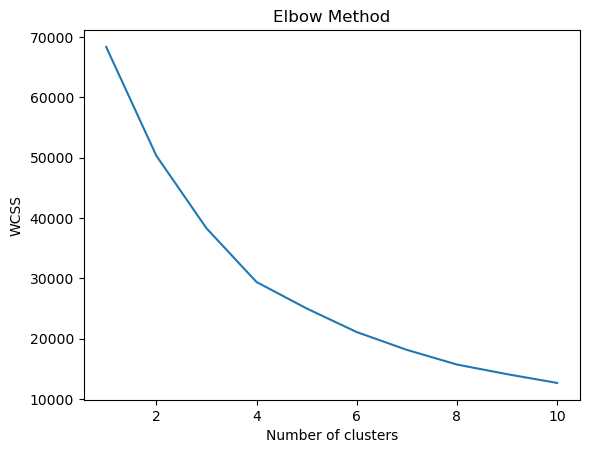

C:\Users\lau\AppData\Local\Temp\ipykernel_31660\1148386998.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = y_kmeans


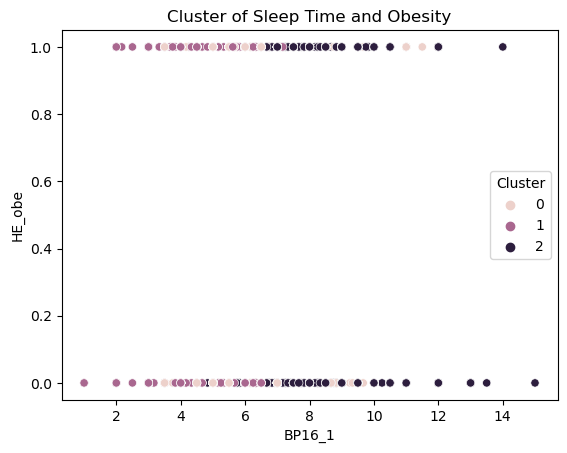

In [388]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 (df는 여러분의 데이터프레임 이름으로 대체하세요)
# df = pd.read_csv('your_data.csv')
# 예시 데이터프레임을 사용하겠습니다.

# 필요한 변수 선택 및 전처리
df_cluster = df[['HE_obe', 'mh_stress', 'BP16_1', 'BP16_2']]
df_cluster.dropna(inplace=True)
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# 엘보우 방법으로 최적의 군집 수 찾기
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 적절한 군집 수를 선택하여 K-평균 군집화 수행
# 예를 들어, 여기서는 3개의 군집을 선택한다고 가정합니다.
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_cluster_scaled)

# 군집화 결과를 원본 데이터프레임에 추가
df['Cluster'] = y_kmeans

# 군집화 결과 시각화
sns.scatterplot(data=df, x='BP16_1', y='HE_obe', hue='Cluster')
plt.title('Cluster of Sleep Time and Obesity')
plt.show()


In [389]:
cl = ['sex', 'HE_obe', 'mh_stress', 'BO1', 'BP16_1', 'BP16_2']
df = df[cl]
df['sex'] = df['sex'].map({1: '남자', 2: '여자'})
print(df.sample(5))

     sex  HE_obe  mh_stress  BO1  BP16_1  BP16_2
974   남자    True        0.0  3.0     6.0     6.0
4129  남자   False        0.0  3.0     7.0     7.0
5797  남자   False        1.0  3.0     7.0     7.0
2883  여자   False        0.0  3.0     8.0    10.0
1115  남자   False        0.0  4.0    10.0    10.0


In [392]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


df_encoded = pd.get_dummies(df, columns=['sex', 'mh_stress', 'BO1'], drop_first=True)

# 비만 유병 여부를 정수로 변환
df_encoded['HE_obe'] = df_encoded['HE_obe'].astype(int)

# 특징과 레이블 분리
X = df_encoded.drop('HE_obe', axis=1)
y = df_encoded['HE_obe']

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\lau\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

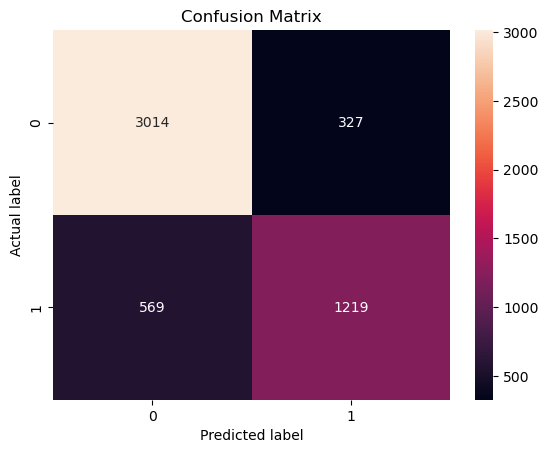

In [393]:
# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


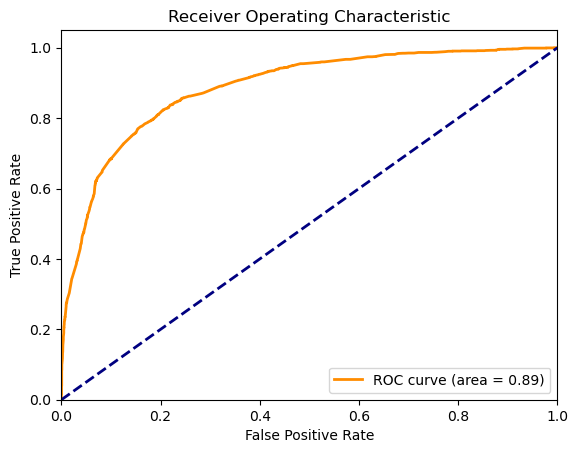

In [394]:
# ROC 곡선 및 AUC
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [395]:
# 회귀 계수 추출
coefficients = model.coef_[0]
features = X_train.columns
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# 회귀 계수 출력
print(coeff_df)

# 회귀 계수의 영향 해석
# 각 특성의 회귀 계수가 양수이면, 해당 특성이 증가함에 따라 종속 변수(여기서는 비만 유병 여부)가 증가하는 경향이 있음을 의미합니다.
# 반대로 음수이면, 해당 특성이 증가함에 따라 종속 변수가 감소하는 경향이 있음을 의미합니다.


         Feature  Coefficient
0         BP16_1     0.046439
1         BP16_2    -0.092654
2         sex_여자    -1.146645
3  mh_stress_1.0    -0.276789
4        BO1_2.0    -1.026756
5        BO1_3.0     1.180997
6        BO1_4.0     3.556380
7        BO1_5.0     6.244270
